# White supremacy classification performance results

In [9]:
# Load results from models
import os
import pandas as pd
import json

experiments = [
    # {'name': 'ws_neutral_annotated_test', 'model': 'ws_neutral_fulltext'},
    # {'name': 'ws_neutral_bias_test', 'model': 'ws_neutral_fulltext'},
    # {'name': '3epochs_domain_test', 'model': 'ws_neutral_fulltext'},
    # {'name': 'ws_neutral_17512_test', 'model': 'ws_neutral_17512'},
    # {'name': 'ws_neutral_21890_test', 'model': 'ws_neutral_21890'},
    # {'name': 'ws_neutral_43780_test', 'model': 'ws_neutral_43780'},
    {'name': 'ws_neutral_5epochs', 'model': 'ws_neutral_5epochs'},
    # {'name': 'ws_antiracist_480000_test', 'model': 'ws_antiracist_480000'}, # is fulltext
    # {'name': 'ws_antiracist_8120_test', 'model': 'ws_antiracist_8120'},
    # {'name': 'ws_antiracist_28420_test', 'model': 'ws_antiracist_28420'},
    {'name': 'ws_antiracist_5epochs', 'model': 'ws_antiracist_5epochs'},
]

# Copy eval performance for models from logs when training
model_eval_perf = {'ws_neutral_fulltext':
                          {'eval_loss': 0.2855835258960724, 'eval_accuracy': {'accuracy': 0.8795835469837618}, 'eval_precision': {'precision': 0.894347724404422}, 'eval_recall': {'recall': 0.8744695227971291}, 'eval_f1': {'f1': 0.8842969266745484}, 'eval_runtime': 1423.5039, 'eval_samples_per_second': 648.019, 'eval_steps_per_second': 20.251, 'epoch': 2.96},
                   'ws_neutral_21980':
                       {'eval_loss': 0.27387407422065735, 'eval_accuracy': {'accuracy': 0.8851113437381043}, 'eval_precision': {'precision': 0.8993858127432135}, 'eval_recall': {'recall': 0.8772980883563524}, 'eval_f1': {'f1': 0.8882046533163561}, 'eval_runtime': 96.9054, 'eval_samples_per_second': 433.742, 'eval_steps_per_second': 13.56, 'epoch': 1.85},
                    'ws_neutral_43780':
                        {'eval_loss': 0.4200771749019623, 'eval_accuracy': {'accuracy': 0.8886800532927294}, 'eval_precision': {'precision': 0.8886527067975216}, 'eval_recall': {'recall': 0.8986097137107839}, 'eval_f1': {'f1': 0.8936034745435114}, 'eval_runtime': 96.9628, 'eval_samples_per_second': 433.486, 'eval_steps_per_second': 13.552, 'epoch': 3.7},
                   'ws_antiracist_480000': # is fulltext
                       {'eval_accuracy': {'accuracy': 0.8797210993374315}, 'eval_precision': {'precision': 0.896496558855438}, 'eval_recall': {'recall': 0.8725841412835219}, 'eval_f1': {'f1': 0.8843787396595962}},
                    'ws_antiracist_28420':
                       {'eval_loss': 0.24517425894737244, 'eval_accuracy': {'accuracy': 0.9261653710972575}, 'eval_precision': {'precision': 0.9147640791476408}, 'eval_recall': {'recall': 0.9581833917915547}, 'eval_f1': {'f1': 0.9359704547477083}, 'eval_runtime': 89.585, 'eval_samples_per_second': 435.106, 'eval_steps_per_second': 13.607, 'epoch': 2.59},
                   'ws_antiracist_4epochs':
                       {'eval_loss': 0.23441056907176971, 'eval_accuracy': {'accuracy': 0.9278585905231022}, 'eval_precision': {'precision': 0.941079295154185}, 'eval_recall': {'recall': 0.9306589217643856}, 'eval_f1': {'f1': 0.9358401022177604}, 'eval_runtime': 89.3103, 'eval_samples_per_second': 436.444, 'eval_steps_per_second': 13.649, 'epoch': 2.92},
                }

# Choose F1 on white supremacist content for datasets that have both white supremacist and not white supremacist;
# accuracy for datasets that only have white supremacist or not white supremacist
dataset_metrics = {
    'adl_heatmap': 'accuracy',
    'hatecheck_identity_nonhate': 'accuracy',
}

dirpath = '../output/bert/'
dfs = []
for exp in experiments:
    
    # Load eval (same domains) performance (too complicated, just looking at wandb output)
    #log_fpath = os.path.join('../code/wandb/', exp['wandb_run'], 'files/output.log')
    #with open(log_fpath) as f:
    #    eval_lines = [json.loads(line) for line in f.read().splitlines() if line.startswith('{eval_loss')]
    #eval_line = [l for l in eval_lines if l['epoch'] == exp['epoch']][0]
    # Could also just run the eval again when run on other test datasets
    if exp['model'] in model_eval_perf:
        eval_perf = model_eval_perf[exp['model']]
        dfs.append(pd.DataFrame([{'dataset': 'eval', 'f1': eval_perf['eval_f1']['f1'], 
                             'precision': eval_perf['eval_precision']['precision'],
                             'recall': eval_perf['eval_recall']['recall'],
                             'accuracy': eval_perf['eval_accuracy']['accuracy'],
                             'model': exp['model']
                            }]))
    
    # Load test performance
    results_fpath = os.path.join(dirpath, exp['name'], 'results.jsonl')
    dfs.append(pd.read_json(results_fpath, orient='records', lines=True).assign(model=exp['model'], path=results_fpath))
    
results = pd.concat(dfs).drop_duplicates()
results = results[results.dataset != 'siegel2021']
results['selected_metric'] = results.dataset.map(lambda x: dataset_metrics.get(x, 'f1'))
results

,dataset,f1,precision,recall,accuracy,model,path,selected_metric
0,alatawi2021,0.693846,0.601333,0.820000,0.601801,ws_neutral_4epochs,../output/bert/ws_neutral/results.jsonl,f1
2,siegel2021_white_nationalist_only,0.440748,0.291209,0.905983,0.516187,ws_neutral_4epochs,../output/bert/ws_neutral/results.jsonl,f1
3,rieger2021,0.176004,0.096836,0.964674,0.356064,ws_neutral_4epochs,../output/bert/ws_neutral/results.jsonl,f1
4,adl_heatmap,0.946597,1.000000,0.898608,0.898608,ws_neutral_4epochs,../output/bert/ws_neutral/results.jsonl,accuracy
5,hatecheck_identity_nonhate,0.000000,0.000000,0.000000,0.441270,ws_neutral_4epochs,../output/bert/ws_neutral/results.jsonl,accuracy
0,eval,0.935840,0.941079,0.930659,0.927859,ws_antiracist_4epochs,NaN,f1
0,alatawi2021,0.696614,0.561873,0.916364,0.560780,ws_antiracist_4epochs,../output/bert/ws_antiracist/results.jsonl,f1
2,siegel2021_white_nationalist_only,0.386555,0.240586,0.982906,0.343525,ws_antiracist_4epochs,../output/bert/ws_antiracist/results.jsonl,f1
3,rieger2021,0.156013,0.084998,0.948370,0.268501,ws_antiracist_4epochs,../output/bert/ws_antiracist/results.jsonl,f1
4,adl_heatmap,0.947148,1.000000,0.899602,0.899602,ws_antiracist_4epochs,../output/bert/ws_antiracist/results.jsonl,accuracy


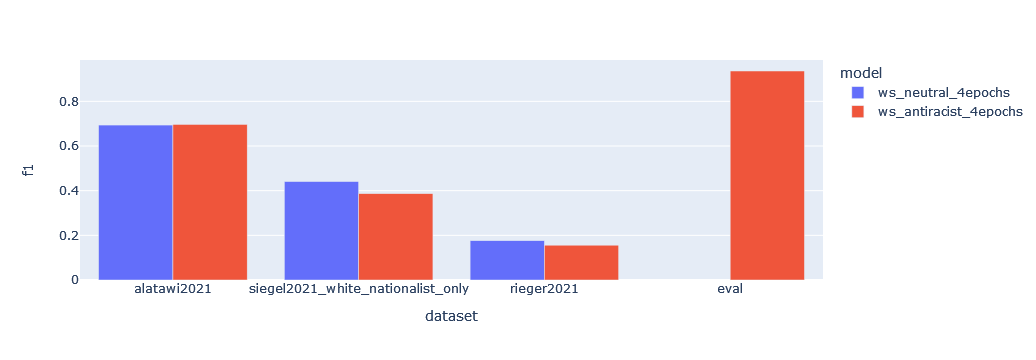

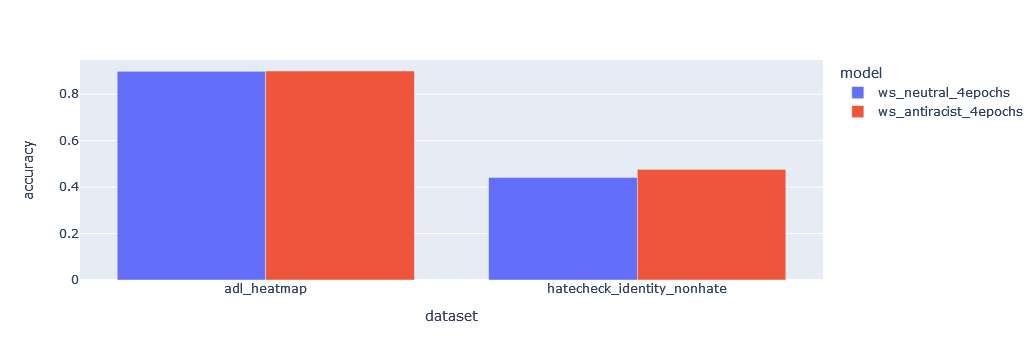

In [10]:
# Plot F1 and accuracies for datasets that contain white supremacist and not
import plotly.express as px

for metric in results.selected_metric.unique():
    selected = results[results.selected_metric == metric]
    px.bar(selected, x='dataset', y=metric, color='model', barmode='group').show()

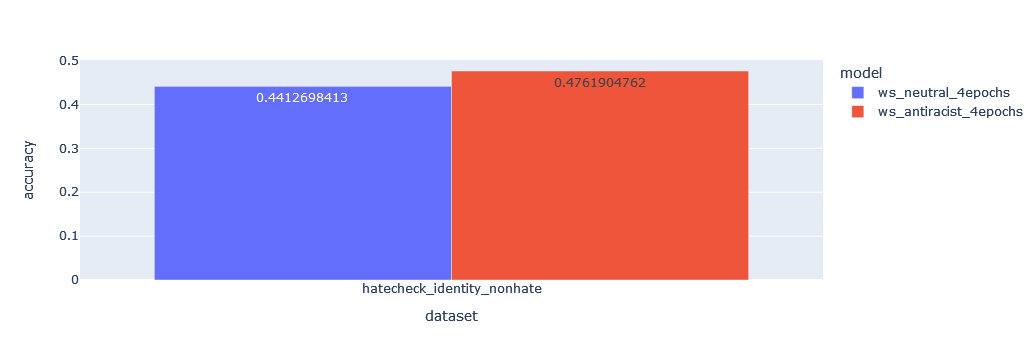

In [13]:
# Plot graphs for specific datasets
dataset = 'hatecheck_identity_nonhate'
selected = results[results.dataset==dataset]
metric = dataset_metrics.get(dataset, 'f1')
px.bar(selected, x='dataset', y=metric, color='model', barmode='group', text=metric).show()

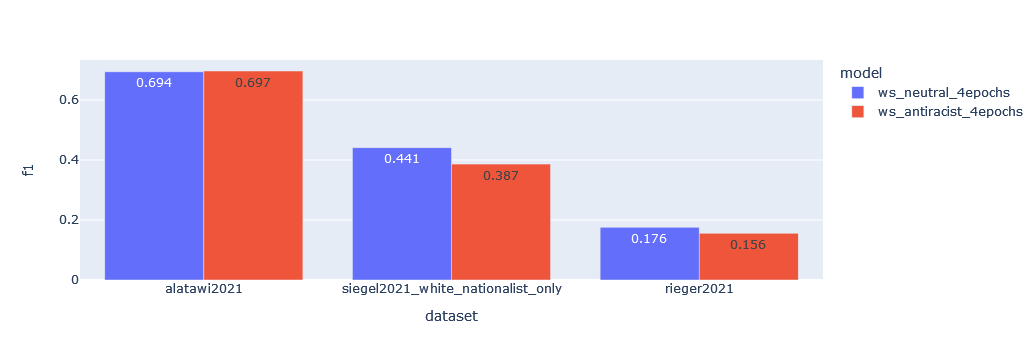

In [21]:
# Plot graphs for specific datasets
datasets = ['alatawi2021', 'siegel2021_white_nationalist_only', 'rieger2021']
selected = results[results.dataset.isin(datasets)]
metric = dataset_metrics.get(dataset, 'f1')
px.bar(selected, x='dataset', y=metric, color='model', barmode='group', text=selected[metric].round(3)).show()

In [19]:
# Unnecessary
results_long = pd.melt(results.drop_duplicates(), id_vars=['dataset', 'model'], value_vars=['f1', 'precision', 'recall', 'accuracy'], var_name='score', ignore_index=True)
results_long

,dataset,model,score,value
0,eval,ws_neutral,f1,0.884297
1,alatawi2021,ws_neutral,f1,0.695430
2,siegel2021,ws_neutral,f1,0.586538
3,siegel2021_white_nationalist_only,ws_neutral,f1,0.466942
4,rieger2021,ws_neutral,f1,0.185420
5,hatecheck_identity_nonhate,ws_neutral,f1,0.000000
6,adl_heatmap,ws_neutral,f1,0.974516
7,eval,ws_antiracist,f1,0.884380
8,alatawi2021,ws_antiracist,f1,0.679828
9,siegel2021,ws_antiracist,f1,0.538574
